In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.append('../')
import dataset_wrapper as util

In [ ]:
# crop_names = m.loc[m['key_crop_name'] != 'No Match', 'key_crop_name'].unique().tolist()

In [23]:
output_vector = util.ModelProcessedDataModified(
    county_name = 'Yolo', 
    year = 2009, 
    crop_names= ['Winter Wheat'])(output_type = "all", 
                                    daily_climate = True)

In [24]:
output_vector['Winter Wheat']['soil_data'].shape

(5, 128)

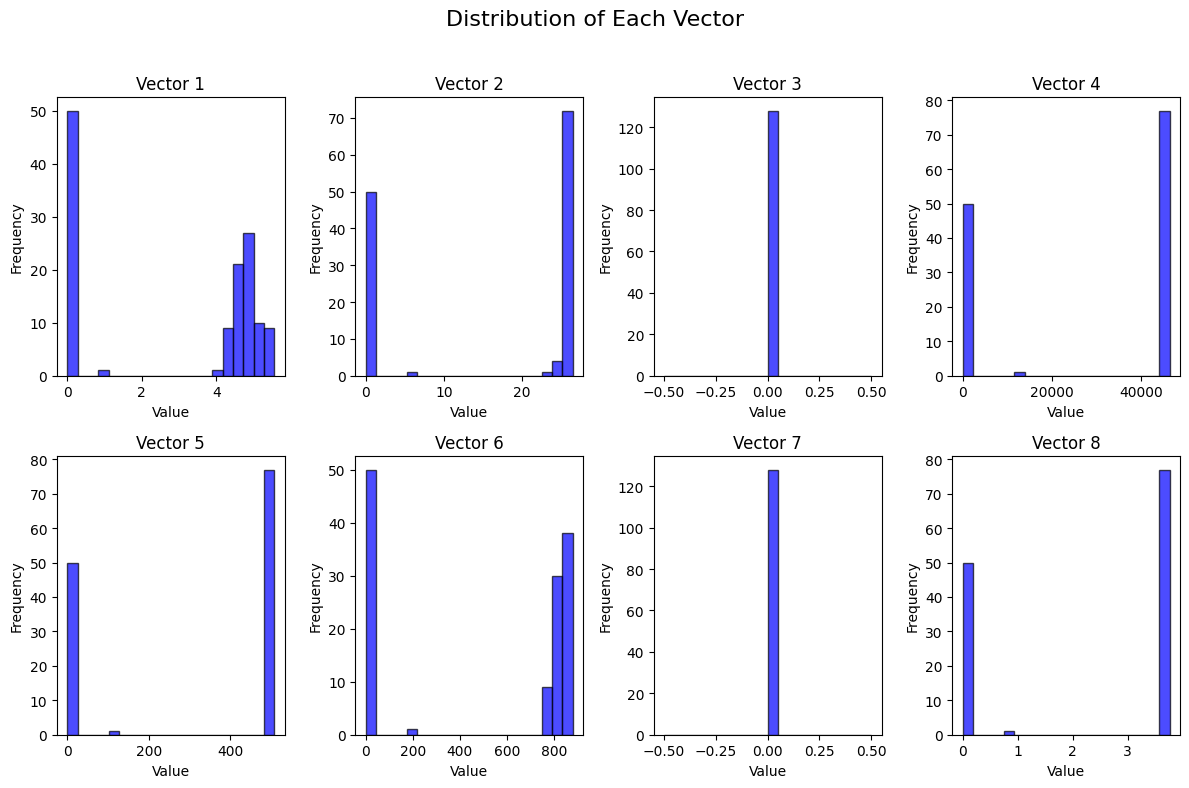

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Example: Generate a 6x128 matrix with random values
matrix = output_vector['Winter Wheat']['climate_data'][100]

# Create a 2x3 subplot layout
fig, axes = plt.subplots(2, 4, figsize=(12, 8))
fig.suptitle("Distribution of Each Vector", fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each vector's distribution
for i in range(8):
    axes[i].hist(matrix[i], bins=20, alpha=0.7, color="blue", edgecolor="black")
    axes[i].set_title(f"Vector {i+1}")
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Prevent title from overlapping
plt.show()

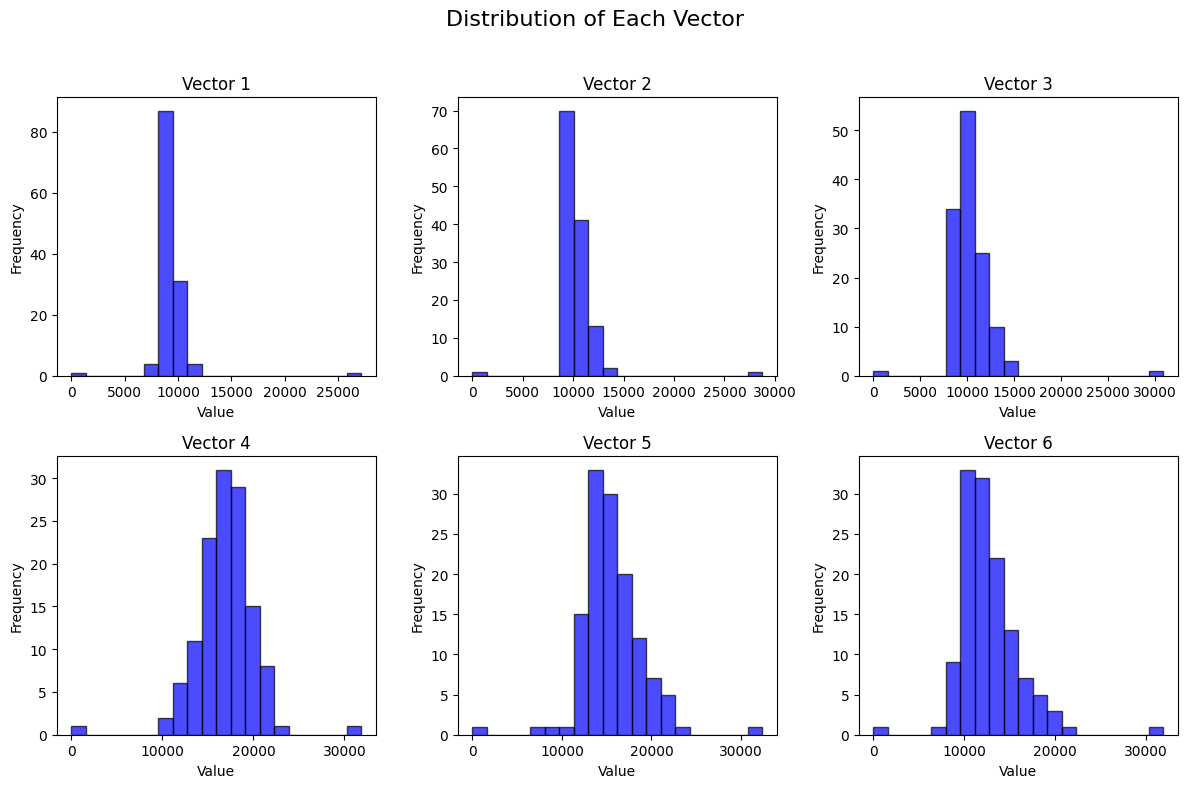

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example: Generate a 6x128 matrix with random values
matrix = output_vector['Winter Wheat']['et_data'][0]

# Create a 2x3 subplot layout
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle("Distribution of Each Vector", fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each vector's distribution
for i in range(6):
    axes[i].hist(matrix[i], bins=20, alpha=0.7, color="blue", edgecolor="black")
    axes[i].set_title(f"Vector {i+1}")
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Prevent title from overlapping
plt.show()

In [ ]:
util.plot_datasets(output_matrix['Winter Wheat']['landsat_data'][5, 0, :3, ...], 
                   output_matrix['Winter Wheat']['landsat_data'][5, 0, :3, ...], 
                   output_matrix['Winter Wheat']['landsat_data'][5, 0, :3, ...],
                   output_matrix['Winter Wheat']['landsat_data'][5, 0, :3, ...], )

In [ ]:
print(output_dataset['Winter Wheat']['landsat_data'].shape, 
                   output_dataset['Winter Wheat']['et_data'].shape, 
                   output_dataset['Winter Wheat']['climate_data'].shape, 
                   output_dataset['Winter Wheat']['soil_data'].shape)

In [18]:
output_dataset = util.CountyDataCreator(
    county_name = 'Yolo', 
    year = 2008, 
    crop_names= ['Winter Wheat'])(output_type = "landsat_data", 
                                    daily_climate = True)

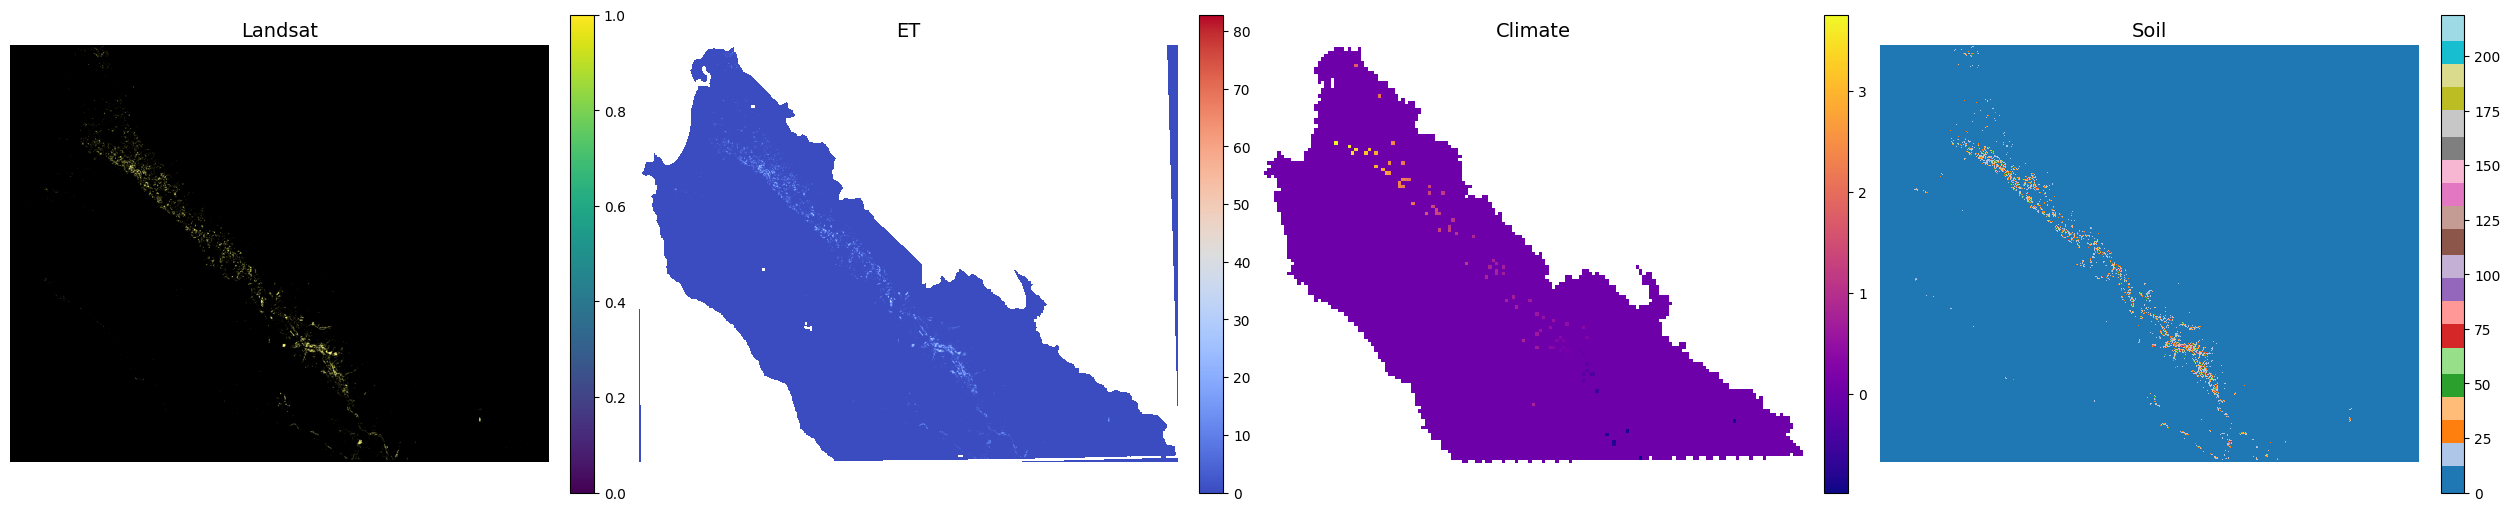

In [ ]:
ccdc.plot_datasets(output_dataset['landsat_data'][5, 0, :3, ...], output_dataset['et_data'][0, 0, 0, ...], output_dataset['climate_data'][0, 1, ...], output_dataset['soil_data'][0, ...])

In [11]:
import os
import rasterio

# Define channel indices for RGB, NIR, SWIR1, and SWIR2 for Landsat 5, 7, and 8
channel_indices = {
    "Landsat5": [1, 2, 3, 4, 5, 7],  # Band 1: Blue, Band 2: Green, Band 3: Red, Band 4: NIR, Band 5: SWIR1, Band 7: SWIR2
    "Landsat7": [1, 2, 3, 4, 5, 7],  # Same as Landsat 5
    "Landsat8": [2, 3, 4, 5, 6, 7],  # Band 2: Blue, Band 3: Green, Band 4: Red, Band 5: NIR, Band 6: SWIR1, Band 7: SWIR2
}

def process_tiff_files(base_folder):
    for year_folder in os.listdir(base_folder):
        if year_folder.isdigit() and 2008 <= int(year_folder) <= 2023:  # Only process folders for the year range
            year_folder_path = os.path.join(base_folder, year_folder)
            if os.path.isdir(year_folder_path):
                for file_name in os.listdir(year_folder_path):
                    if file_name.endswith(".tif"):
                        file_path = os.path.join(year_folder_path, file_name)
                        
                        # Extract the year from the file name (not folder)
                        year = extract_year_from_file_name(file_name)
                        
                        if year is not None and 2008 <= year <= 2023:
                            # Determine Landsat satellite
                            if year <= 2012:
                                satellite = "Landsat5"
                            elif year <= 2013:
                                satellite = "Landsat7"
                            else:
                                satellite = "Landsat8"
                            
                            with rasterio.open(file_path) as src:
                                num_channels = src.count
                                if num_channels > 6:
                                    selected_indices = channel_indices[satellite]
                                    selected_bands = src.read(selected_indices)
                                    
                                    # Save the selected bands to a new file
                                    output_folder = os.path.join(base_folder, "processed", year_folder)
                                    os.makedirs(output_folder, exist_ok=True)
                                    output_path = os.path.join(output_folder, f"processed_{file_name}")
                                    
                                    profile = src.profile
                                    profile.update(count=len(selected_indices))
                                    
                                    with rasterio.open(output_path, "w", **profile) as dst:
                                        dst.write(selected_bands)
                                    
                                    print(f"Processed {file_name}: {satellite} -> {output_path}")

def extract_year_from_file_name(file_name):
    # Example filename: Monterey_LT_20080207
    # Extract the year (4th component) from the filename format
    parts = file_name.split("_")
    if len(parts) > 2:
        try:
            date_str = parts[-1]
            year = int(date_str[:4])  # First 4 digits are the year
            return year
        except ValueError:
            return None
    return None

# Specify the base folder containing year-based folders
base_folder = "/data2/hkaman/Data/FoundationModel/Monterey/Landsat"
process_tiff_files(base_folder)

Processed Monterey_LT_20110404.tif: Landsat5 -> /data2/hkaman/Data/FoundationModel/Monterey/Landsat/processed/2011/processed_Monterey_LT_20110404.tif
Processed Monterey_LT_20111102.tif: Landsat5 -> /data2/hkaman/Data/FoundationModel/Monterey/Landsat/processed/2011/processed_Monterey_LT_20111102.tif
Processed Monterey_LT_20110506.tif: Landsat5 -> /data2/hkaman/Data/FoundationModel/Monterey/Landsat/processed/2011/processed_Monterey_LT_20110506.tif
Processed Monterey_LT_20110607.tif: Landsat5 -> /data2/hkaman/Data/FoundationModel/Monterey/Landsat/processed/2011/processed_Monterey_LT_20110607.tif
Processed Monterey_LT_20111013.tif: Landsat5 -> /data2/hkaman/Data/FoundationModel/Monterey/Landsat/processed/2011/processed_Monterey_LT_20111013.tif
Processed Monterey_LT_20110927.tif: Landsat5 -> /data2/hkaman/Data/FoundationModel/Monterey/Landsat/processed/2011/processed_Monterey_LT_20110927.tif
Processed Monterey_LT_20181203.tif: Landsat8 -> /data2/hkaman/Data/FoundationModel/Monterey/Landsat/

In [ ]:
out = util.modify_crop_attr_df(county_name = 'Fresno')
out

/tmp/ipykernel_110867/3587780708.py:40: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_new.fillna(method='bfill', inplace=True)  # Fill with next valid value
/tmp/ipykernel_110867/3587780708.py:41: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_new.fillna(method='ffill', inplace=True)  # Fill with previous valid value


,aws0100wta,slopegraddcp,awmmfpwwta,drclassdcd,hydgrpdcd,mukey
0,14.00,0.1,0.678,Poorly drained,C,467013
1,15.59,0.1,0.000,Poorly drained,B,467014
2,13.32,0.1,1.000,Somewhat poorly drained,C,467015
3,13.66,0.1,1.000,Poorly drained,D,467016
4,11.00,0.0,1.000,Very poorly drained,D,467017
...,...,...,...,...,...,...
151,6.28,15.0,1.000,Well drained,C,2562661
152,7.25,52.0,1.000,Well drained,C,2562662
153,15.86,1.0,0.426,Well drained,C,2766031
154,12.00,1.0,0.450,Well drained,A,2766119


In [9]:
import os
import re

# Define the parent directory where the subfolders (2008-2022) are located
parent_dir = "/data2/hkaman/Data/FoundationModel/Inputs/Fresno/Raw/Landsat"

# Loop through years 2008 to 2022, excluding 2012
for year in range(2020, 2023):
    if year == 2012:
        continue  # Skip 2012

    folder_path = os.path.join(parent_dir, str(year))

    # Check if the folder exists
    if not os.path.exists(folder_path):
        print(f"Skipping missing folder: {folder_path}")
        continue

    # Iterate over files in the folder
    for filename in os.listdir(folder_path):
        # Match files with the pattern "Landsat_Mosaic_Yolo_YYYY-MM-DD_YYYY-MM-DD.tif"
        # match = re.match(r"Fresno_(\d{4})-(\d{2})-(\d{2})_*.tif", filename)
        match = re.match(r"Fresno_(\d{4})-(\d{2})-(\d{2})-(\d+)-(\d+)\.tif$", filename)

        
        if match:
            # Extract year, month, and day from the first date
            file_year, file_month, file_day, _, _ = match.groups()
            
            # Construct the new filename
            new_filename = f"Fresno_{file_year}_{file_month}_{file_day}.tif"
            
            # Define full paths
            old_path = os.path.join(folder_path, filename)
            new_path = os.path.join(folder_path, new_filename)

            # Rename the file
            os.rename(old_path, new_path)
            print(f"Renamed: {filename} → {new_filename}")

print("Renaming completed.")

Renamed: Fresno_2020-03-01-0000000000-0000000000.tif → Fresno_2020_03_01.tif
Renamed: Fresno_2020-10-01-0000000000-0000000000.tif → Fresno_2020_10_01.tif
Renamed: Fresno_2020-11-01-0000000000-0000000000.tif → Fresno_2020_11_01.tif
Renamed: Fresno_2020-12-01-0000000000-0000000000.tif → Fresno_2020_12_01.tif
Renamed: Fresno_2020-02-01-0000000000-0000000000.tif → Fresno_2020_02_01.tif
Renamed: Fresno_2020-08-01-0000000000-0000000000.tif → Fresno_2020_08_01.tif
Renamed: Fresno_2020-06-01-0000000000-0000000000.tif → Fresno_2020_06_01.tif
Renamed: Fresno_2020-05-01-0000000000-0000000000.tif → Fresno_2020_05_01.tif
Renamed: Fresno_2020-01-01-0000000000-0000000000.tif → Fresno_2020_01_01.tif
Renamed: Fresno_2020-07-01-0000000000-0000000000.tif → Fresno_2020_07_01.tif
Renamed: Fresno_2020-08-01-0000000000-0000009472.tif → Fresno_2020_08_01.tif
Renamed: Fresno_2020-09-01-0000000000-0000000000.tif → Fresno_2020_09_01.tif
Renamed: Fresno_2021-10-01-0000000000-0000000000.tif → Fresno_2021_10_01.tif

In [ ]:
for year in range(2009, 2023):
    if year != 2012:
        modified = {}
        npz_file_path = f'/data2/hkaman/Data/FoundationModel/Inputs/Monterey/InD/{year}/Monterey_{year}.npz'
        loaded_data = np.load(npz_file_path, allow_pickle=True)["input"].item()
        crop_names =list(loaded_data.keys())
        for crop_name in loaded_data.keys():
            crop_output = {}
            landsat = loaded_data[crop_name]['landsat_data']
            et = loaded_data[crop_name]['et_data']
            climate = loaded_data[crop_name]['climate_data']
            soil = loaded_data[crop_name]['soil_data']

            print(crop_name)
            print(landsat.shape, et.shape, climate.shape, soil.shape)
            if landsat.shape[-1] != 0 and et.shape[-1] != 0 and climate.shape[-1] != 0 and soil.shape[-1] != 0: 
                landsat_str = util.stratified_sampling(landsat, num_samples=128)
                et_str = util.stratified_sampling(et, num_samples=128)
                climate_str = util.stratified_sampling(climate, num_samples=128)
                soil_str = util.stratified_sampling(soil, num_samples=128)
                print(landsat_str.shape, et_str.shape, climate_str.shape, soil_str.shape)
                print()
                crop_output['landsat_data'] = landsat_str
                crop_output['et_data'] = et_str
                crop_output['climate_data'] = climate_str
                crop_output['soil_data'] = soil_str

                modified[crop_name] = crop_output

        import numpy
        npz_file_path_modified = f'/data2/hkaman/Data/FoundationModel/Inputs/Monterey/InD/{year}/Monterey_{year}_modified.npz'
        numpy.savez_compressed(npz_file_path_modified, inumpyut = modified)

In [5]:
import numpy as np
loaded_data = np.load('/data2/hkaman/Data/FoundationModel/Inputs/Monterey/InD/2008/Monterey_2008.npz', allow_pickle=True)["inumpyut"].item()
loaded_data

{'Herbs': {'landsat_data': array([[[8.54717383e+03, 8.66357686e+03, 8.74717589e+03, ...,
           1.17980132e+04, 1.19442576e+04, 1.21640508e+04],
          [9.11106934e+03, 9.23009981e+03, 9.24154095e+03, ...,
           1.39532498e+04, 1.42368070e+04, 1.48515781e+04],
          [8.77934668e+03, 9.35894264e+03, 9.46619355e+03, ...,
           1.51057836e+04, 1.53585277e+04, 1.66820879e+04],
          [1.02845264e+04, 1.03958309e+04, 1.04768628e+04, ...,
           1.82721602e+04, 2.09907175e+04, 2.27982168e+04],
          [1.20781094e+04, 1.24988979e+04, 1.27412869e+04, ...,
           2.27051109e+04, 2.32471592e+04, 2.48174160e+04],
          [9.19756738e+03, 1.02892361e+04, 1.04396659e+04, ...,
           2.04783708e+04, 2.09314470e+04, 2.24989160e+04]],
  
         [[8.54717383e+03, 8.66357686e+03, 8.74717589e+03, ...,
           1.17980132e+04, 1.19442576e+04, 1.21640508e+04],
          [9.11106934e+03, 9.23009981e+03, 9.24154095e+03, ...,
           1.39532498e+04, 1.42368070e+

In [4]:
print("Keys in the npz file:", loaded_data.files)

Keys in the npz file: ['inumpyut']
